<h1><center>IE 313 Time Series Analysis: Code Implementation Assignment 1</center></h1>

<div align="right">2022 Fall, Prof. Yongjae Lee</div>
<div align="right"> Coded by TA. JunPyo Park</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Data</a></span></li><li><span><a href="#Your-Data-Overview" data-toc-modified-id="Your-Data-Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Your Data Overview</a></span><ul class="toc-item"><li><span><a href="#Plot-Scatter" data-toc-modified-id="Plot-Scatter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot Scatter</a></span></li><li><span><a href="#Resample-Data" data-toc-modified-id="Resample-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Resample Data</a></span></li></ul></li><li><span><a href="#Define-Variables" data-toc-modified-id="Define-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define Variables</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting-Linear-Regression" data-toc-modified-id="Fitting-Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fitting Linear Regression</a></span></li><li><span><a href="#Plot-Linear-Regression-Results" data-toc-modified-id="Plot-Linear-Regression-Results-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plot Linear Regression Results</a></span></li><li><span><a href="#Linear-Regression-MSE" data-toc-modified-id="Linear-Regression-MSE-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Linear Regression MSE</a></span></li></ul></li><li><span><a href="#Residual-Analysis" data-toc-modified-id="Residual-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Residual Analysis</a></span><ul class="toc-item"><li><span><a href="#Residual-and-Standardized-Residual" data-toc-modified-id="Residual-and-Standardized-Residual-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Residual and Standardized Residual</a></span></li><li><span><a href="#Plot-Standardized-Residuals" data-toc-modified-id="Plot-Standardized-Residuals-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot Standardized Residuals</a></span></li><li><span><a href="#Histogram-of-Standardized-Residuals" data-toc-modified-id="Histogram-of-Standardized-Residuals-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Histogram of Standardized Residuals</a></span></li><li><span><a href="#Q-Q-Plot" data-toc-modified-id="Q-Q-Plot-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Q-Q Plot</a></span></li><li><span><a href="#Autocorrelation-function-(Correlogram)" data-toc-modified-id="Autocorrelation-function-(Correlogram)-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Autocorrelation function (Correlogram)</a></span></li></ul></li><li><span><a href="#Quadratic-Trends-Regression" data-toc-modified-id="Quadratic-Trends-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quadratic Trends Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting-Quadratic-Trends-Regression" data-toc-modified-id="Fitting-Quadratic-Trends-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fitting Quadratic Trends Regression</a></span></li><li><span><a href="#Quadratic-Trends-Regression-MSE" data-toc-modified-id="Quadratic-Trends-Regression-MSE-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Quadratic Trends Regression MSE</a></span></li></ul></li><li><span><a href="#Other-Curve-Fitting" data-toc-modified-id="Other-Curve-Fitting-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Other Curve Fitting</a></span><ul class="toc-item"><li><span><a href="#Fitting-Curve-Regression" data-toc-modified-id="Fitting-Curve-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fitting Curve Regression</a></span></li><li><span><a href="#Quadratic-Trends-Regression-MSE" data-toc-modified-id="Quadratic-Trends-Regression-MSE-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Quadratic Trends Regression MSE</a></span></li></ul></li></ul></div>

Install the required packages using pip
* Install using pip : `pandas`, `sklearn`, `matplotlib`, `statsmodels`
* This code was developed in Python 3.8 and any other versions are allowed.

In [1520]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

## Read Data

![](https://trello.com/1/cards/62469d0f1dfc968cf7510f2b/attachments/63183fba10424b00f60b8b47/previews/63183fbb10424b00f60b8b6b/download/image.png)

Download your data file in Excel (.csv) as shown in the figure above.

* You can use time-series data, which have 'Date' or 'Timestamp' columns.
* Also, you can use sequential data which do not have 'Date' columns.

Read '.csv' file in the form of DataFrame (pandas.DataFrame) through 'read_csv' method in Pandas. 

* Else, read using 'read_excel' method. 
* In this example, daily closing price of APPLE Inc. was used.
* If there is 'Date' column, indexing is possible by specifying 'index_col' as below.

In [1521]:
# use your own data
data = pd.read_csv('commodity_futures.csv', index_col='Date', usecols=['Date', 'WHEAT'], skiprows=[i for i in range(1, 4129)])


It is convenient to change Date dtype from 'object' to 'datetime'.

In [1522]:
# check index type
data.index

Index(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
       ...
       '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
       '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16'],
      dtype='object', name='Date', length=1735)


Convert index type using 'pd.to_datetime' method.

In [1523]:
# convert index type to datetime
data.index = pd.to_datetime(data.index)

In [1524]:
# Check that dtype has changed to datetime
data.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', name='Date', length=1735, freq=None)

## Your Data Overview


Visualize your data using 'plot()' function.

<AxesSubplot:xlabel='Date'>

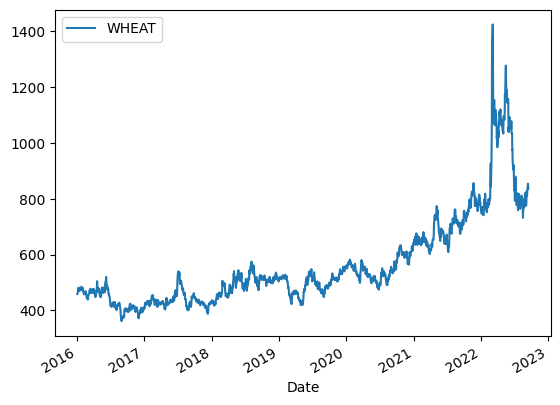

In [1525]:
data.plot()

### Plot Scatter

The figure below is a scatter plot in the textbook, and draw a graph to examine the relationship with the previous points.

![](https://trello.com/1/cards/62469d0f1dfc968cf7510f2b/attachments/63183fcc8ab03000373d8d61/previews/63183fcc8ab03000373d8d69/download/image.png)


Shift your data by one time step interval through 'shift(1)' and draw a scatter plot.

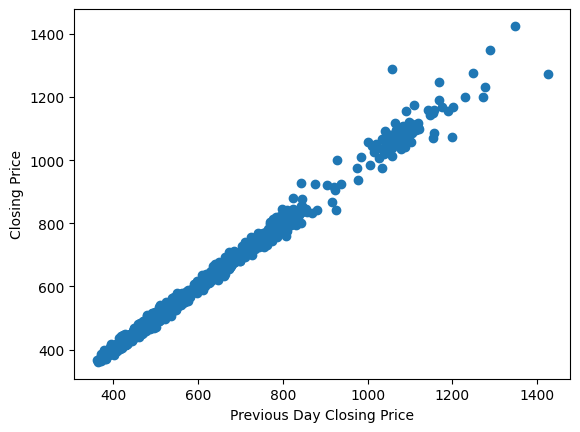

In [1526]:
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day Closing Price')
plt.ylabel('Closing Price');

### Resample Data

Follow this part if you need to resample your data.

Set a different period using the `resample` (In this example,the period is changed from daily to monthly).

In [1527]:
# monthly_data = data.resample('M').first() # resample with closing price on the first trading day of the month 
# monthly_data = data.resample('M').mean() # resample with monthly average closing price
monthly_data = data.resample('M').last() # resample with closing price on the last trading day of the month 

In [1528]:
monthly_data.head()

,WHEAT
Date,
2016-01-31,479.25
2016-02-29,445.00
2016-03-31,473.50
2016-04-30,478.00
2016-05-31,464.50


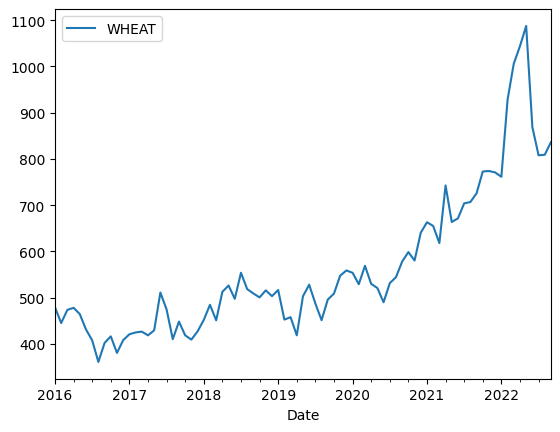

In [1529]:
# visualize resampled data
monthly_data.plot();

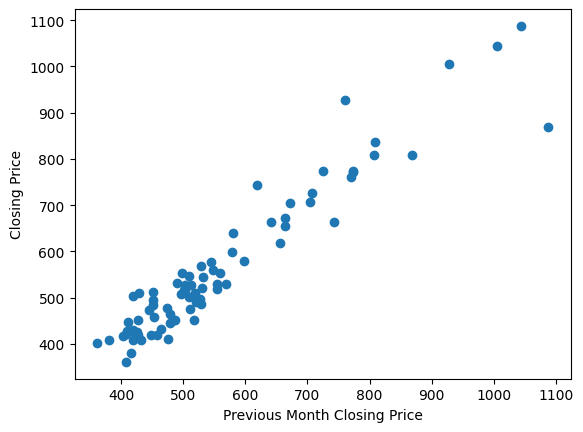

In [1530]:
# Relationship with the previous month
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Closing Price')
plt.ylabel('Closing Price');

## Define Variables

Set x so that can represent time as the length of data.


In [1531]:
x = np.arange(len(data))

Set y as the target of your analysis.

In [1532]:
# y = data.values.reshape(-1,1)
y = data.values

## Linear Regression

How to run the Linear Regression

$$y=w_0+w_1 x =\begin{bmatrix}
w_0 & w_1
\end{bmatrix}   \begin{bmatrix}
1\\
x
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Find the parameter $\mathbf{w}$ based on linear regression model above.


Calculate vector $\mathbf{x}$.
Use `add_constant` method in statsmodels.

In [1533]:
X = sm.add_constant(x)
X

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 1.732e+03],
       [1.000e+00, 1.733e+03],
       [1.000e+00, 1.734e+03]])



Now, $y$ and $\mathbf{x}$ are ready. Find $\mathbf{w}$ to minimize the residual.



Use 'OLS.fit()' in statsmodels to fit linear model.
Use `summary()` method to analyze the result of model(p-value, R-squared, etc).



*   Fitting means to optimize $\mathbf{w}$.
*   Ordinary Least Square (OLS) can be utilized to minimize Mean Squared Error (MSE).



### Fitting Linear Regression

In [1534]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3134.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:04:56   Log-Likelihood:                -10441.
No. Observations:                1735   AIC:                         2.089e+04
Df Residuals:                    1733   BIC:                         2.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.6132      4.773     69.477      0.0



Calculate the parameter $\mathbf{w}$ using `params` method.

In [1535]:
lin_reg.params # w_0, w_1

array([3.31613179e+02, 2.66848243e-01])

In [1536]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]

In [1537]:
intercept

331.6131786278706

In [1538]:
coef

0.26684824285980346

Finally, $$y=12.600+0.062 x$$ is obtained.

### Plot Linear Regression Results


Use the `predict` method to calculate the model prediction for input x

* Plot with your data

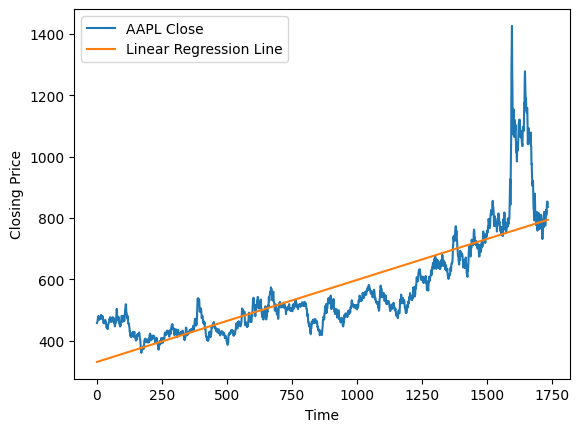

In [1539]:
plt.plot(x,y,label='AAPL Close') # original data

y_hat = lin_reg.predict(X)
plt.plot(x,y_hat,label='Linear Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend();

### Linear Regression MSE


Calculate Mean Squared Error (MSE) of model using `mse_resid` method.

In [1540]:
# MSE
lin_reg.mse_resid

9889.860754494355

## Residual Analysis

Follow this part to practice with your data.

### Residual and Standardized Residual

$$\text{Residual}=y_t - \hat{y}_t$$

Calculate the residual using `lin_reg.resid` method.

In [1541]:
residual = lin_reg.resid

This residual is not standardized.

In [1542]:
residual

array([126.63682137, 129.36997313, 130.60312489, ...,  59.95566474,
        50.9388165 ,  41.92196825])


Use the below function to standardize residual.

In [1543]:
def standardized(array_like):
    mean = array_like.mean()
    std = array_like.std(ddof=1)
    return pd.Series((array_like - mean) / std)

`s_residual`: Standardized Residual

In [1544]:
s_residual = standardized(residual)

### Plot Standardized Residuals

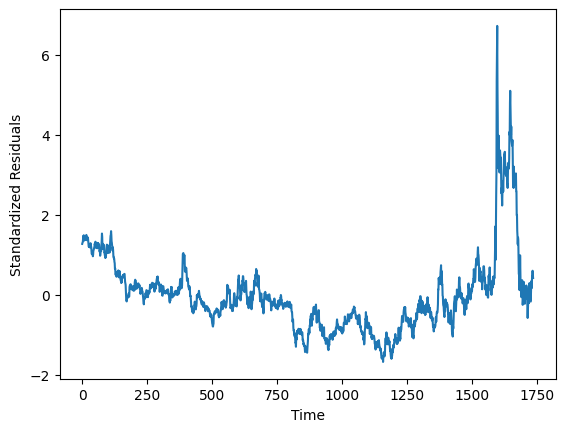

In [1545]:
s_residual.plot();
plt.xlabel('Time')
plt.ylabel('Standardized Residuals');

You can realize the fact that standardized residual is not seen as white noise.

### Histogram of Standardized Residuals

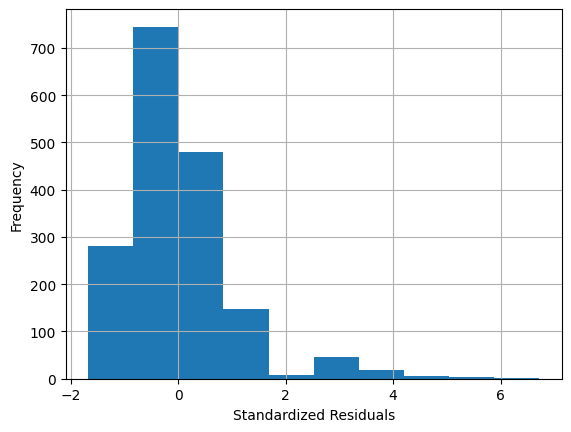

In [1546]:
s_residual.hist();
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency');

You can notice that the residual does not follow the normal distribution.

### Q-Q Plot

There is another method to visualize normality, Q-Q plot.

Plot with the scipy `probplot` function.

If you put the normal distribution in the dist as shown below, and if the dots are distributed along the red line, it means that the residual is close to the normal distribution.

In this example, it does not follow the normal distribution.

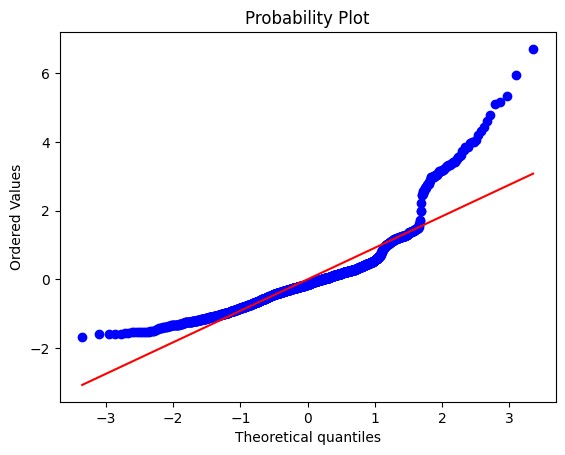

In [1547]:
stats.probplot(s_residual, dist=stats.norm, plot=plt);

### Autocorrelation function (Correlogram)


Plot the Correlogram(in Lecture note #3, p.36) using `plot_acf` in statsmodels.

Input the residual and put the number of lags you want check.

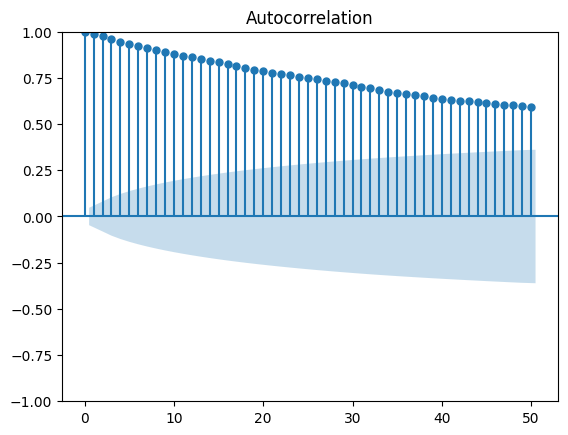

In [1548]:
sm.graphics.tsa.plot_acf(residual, lags=50);

In this example, all values are out of range of standard errors, so the residual is not seen as white noise.

## Quadratic Trends Regression


Running Quadratic Trends Regression is not quite different with the linear regression method.

$$y=w_0+w_1x+w_2 x^2  =\begin{bmatrix}
w_0 & w_1 & w_2
\end{bmatrix}   \begin{bmatrix}
1\\
x\\
x^2
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




Set $\mathbf{w}$, $\mathbf{x}$ as shown above, and get the optimal parameter using OLS.

*  The reason why it is linear here is that the degree of $w$ is 1, regardless of degree of $w$.



Generate $\mathbf{x}$ using `PolynomialFeatures` and `fit_transform` method.

* It assumes that there is a Quadratic Trends, so degree is 2.
* Because of the bias term ($w_0$), set include_bias=True.
* Reshape about input x in `fit_transform`.

In [1549]:
poly_features = PolynomialFeatures(degree=2, include_bias=True)

In [1550]:
X = poly_features.fit_transform(x.reshape(-1,1)) # need to reshape x here

In [1551]:
X.shape # (N, 3)

(1735, 3)

### Fitting Quadratic Trends Regression

In [1552]:
# Regression
quad_reg = sm.OLS(y, X).fit()
print(quad_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3793.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:04:57   Log-Likelihood:                -9877.2
No. Observations:                1735   AIC:                         1.976e+04
Df Residuals:                    1732   BIC:                         1.978e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        485.0076      5.170     93.807      0.0

In [1553]:
# get predicted value
y_hat = quad_reg.predict(X)

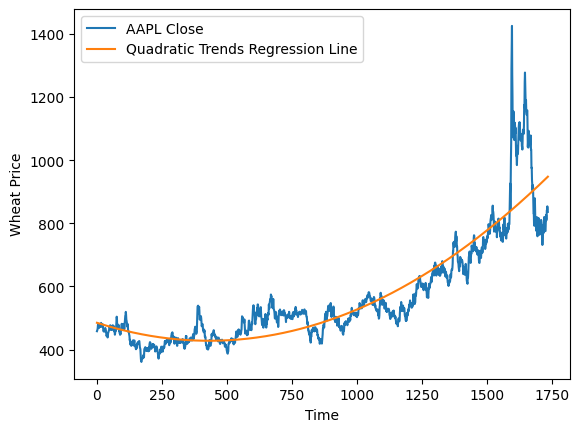

In [1554]:
plt.plot(x,y,label='AAPL Close') # original data

y_hat = quad_reg.predict(X)
plt.plot(x,y_hat,label='Quadratic Trends Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Wheat Price')
plt.legend();

### Quadratic Trends Regression MSE

In [1555]:
lin_reg.mse_resid #Linear Regression MSE

9889.860754494355

In [1556]:
quad_reg.mse_resid

5165.1163238910585

## Other Curve Fitting

You can freely fit regression by adding trigonometric functions or other trends to match your data as shown below.

$$y=w_0+w_1x+w_2 \text{sin}(2 \pi fx) + w_3 \text{cos}(2 \pi fx)$$


$$y=\begin{bmatrix}
w_0 & w_1 & w_2 & w_3 \end{bmatrix}\begin{bmatrix}
1\\
x\\
\text{sin}(2 \pi fx)\\
\text{cos}(2 \pi fx)
\end{bmatrix} = \mathbf{w}\mathbf{x}$$




For example, in the case of model which contains linear, sine and cosine trends, set x as shown below.

* f, which is related to frequency in sine and cosine trends, should be set in advance. 
* In this example, f = $\frac{0.001}{2 \pi}$

* Find the f value that fits your data for regression.


Generate  $\mathbf{x}$ using `np.columns_stack` .

In [1557]:
f = 0.001 / (2*np.pi)
f

0.00015915494309189535

In [1558]:
X = np.column_stack((np.ones(len(x)), x,
                     np.sin(2* np.pi * f*x), np.cos(2* np.pi * f*x)))

In [1559]:
X.shape # (N, 4)

(1735, 4)

### Fitting Curve Regression

In [1560]:
curve_reg = sm.OLS(y, X).fit()
print(curve_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2813.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:04:58   Log-Likelihood:                -9800.8
No. Observations:                1735   AIC:                         1.961e+04
Df Residuals:                    1731   BIC:                         1.963e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -178.1091     85.287     -2.088      0.0

In [1561]:
print("Parameters: ", curve_reg.params) # parameter w

Parameters:  [ -178.1091206      1.50949334 -1359.93352793   604.47127268]


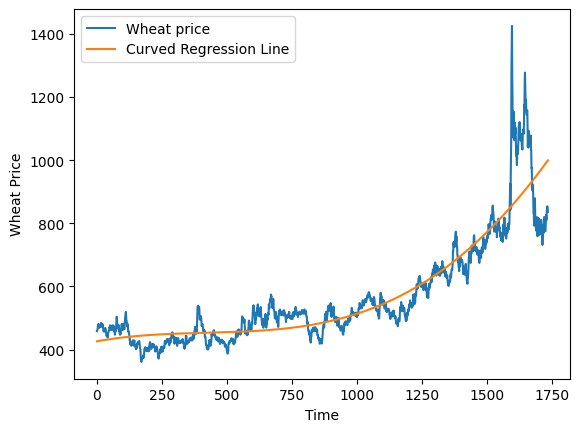

In [1562]:
plt.plot(x,y,label='Wheat price') # original data

y_hat = curve_reg.predict(X)
plt.plot(x,y_hat,label='Curved Regression Line') # regression line

plt.xlabel('Time')
plt.ylabel('Wheat Price')
plt.legend();

### Quadratic Trends Regression MSE

In [1563]:
lin_reg.mse_resid #LInear Regression MSE

9889.860754494355

In [1564]:
quad_reg.mse_resid #Quadratic Trends Regression

5165.1163238910585

In [1565]:
curve_reg.mse_resid

4732.346271950888

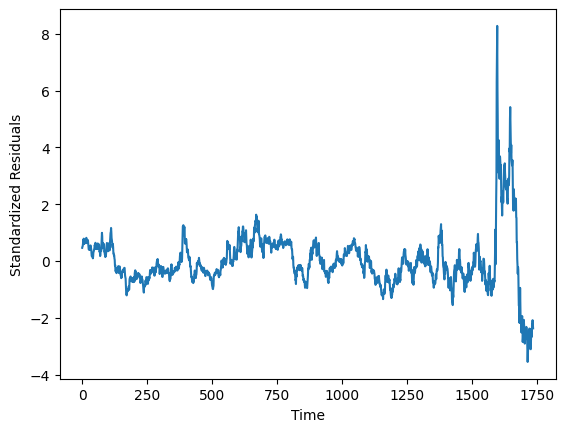

In [1566]:
cresidual = curve_reg.resid
s_cresidual = standardized(cresidual)
s_cresidual.plot();
plt.xlabel('Time')
plt.ylabel('Standardized Residuals');


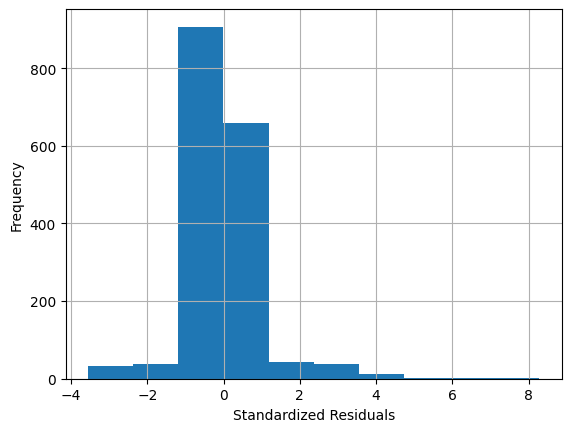

In [1567]:
s_cresidual.hist();
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency');

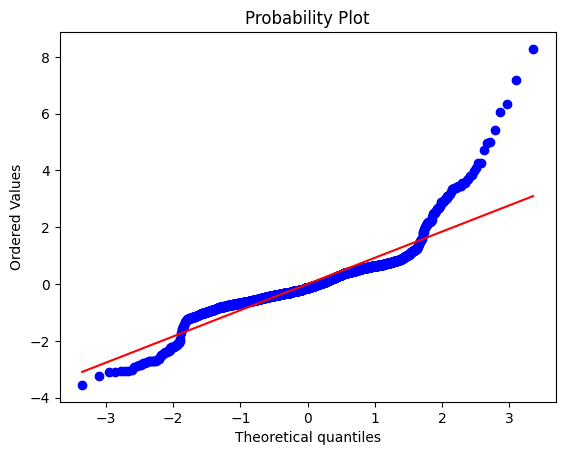

In [1568]:
stats.probplot(s_cresidual, dist=stats.norm, plot=plt);

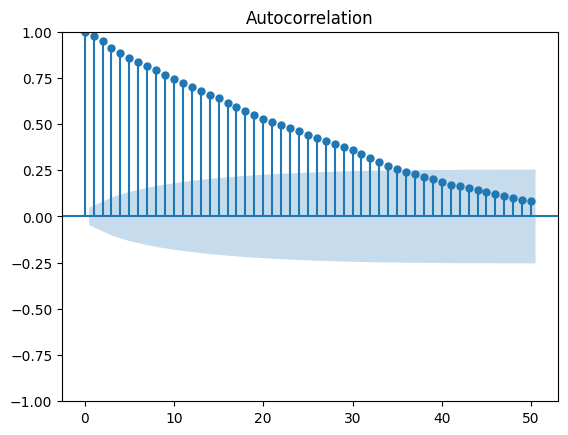

In [1569]:
sm.graphics.tsa.plot_acf(cresidual, lags=50);